# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

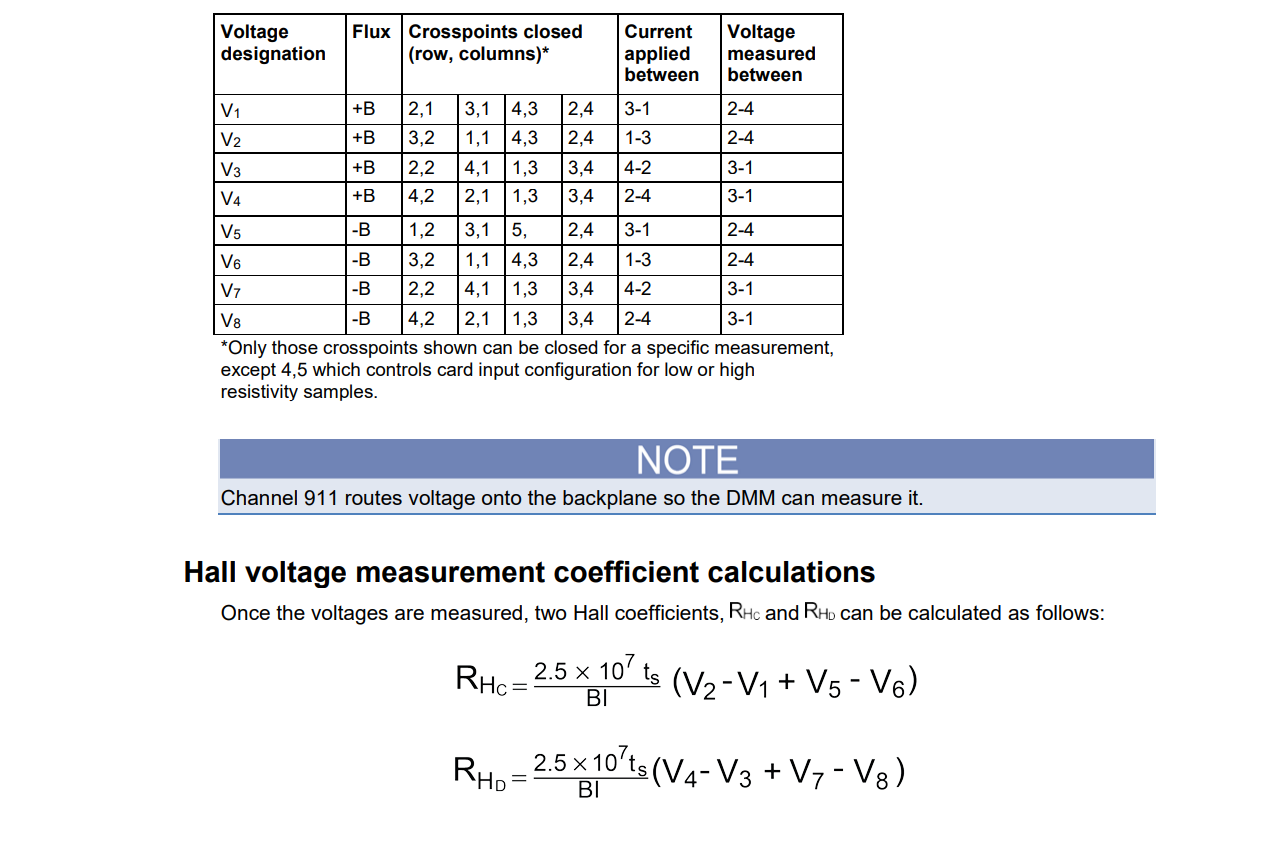

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [51]:
truncate = False # True it contains data from O to Bmax
path = r"C:\Users\Admin\Desktop\Analysis\Data\A302\HALL"
filename = 'A302_DSO_2p_to_2n__test_150K.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00002,20000.367969,150.000390,64.628960,-64.614339,-64.738621,64.782828,5.997000e-07,1000000.0
1,0.00002,16000.351367,150.000970,65.351178,-65.377976,-65.487642,65.523061,6.021000e-07,1000000.0
2,0.00002,12000.449512,150.000721,66.178656,-66.187310,-66.255105,66.282116,5.996000e-07,1000000.0
3,0.00002,8000.392090,150.000579,67.002173,-67.015794,-67.047608,67.090904,6.119000e-07,1000000.0
4,0.00002,4000.210376,149.999976,67.837989,-67.840075,-67.885181,67.922732,5.965000e-07,1000000.0
5,0.00002,0.129805,150.000392,68.671654,-68.696471,-68.716996,68.752536,6.148000e-07,1000000.0
6,0.00002,-4000.614368,150.000974,67.858014,-67.871398,-67.812880,67.844845,6.002000e-07,1000000.0
7,0.00002,-8000.233618,150.000274,67.061058,-67.094930,-66.986788,67.014997,6.047000e-07,1000000.0
8,0.00002,-12000.325439,149.999851,66.258680,-66.263423,-66.180949,66.197504,5.960000e-07,1000000.0
9,0.00002,-16000.306445,150.000075,65.493212,-65.493169,-65.350090,65.384137,6.206000e-07,1000000.0


### Converting B to integer B

In [28]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [29]:

df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00002,20000.367969,20000,150.000390,64.628960,-64.614339,-64.738621,64.782828,5.997000e-07,1000000.0
1,0.00002,16000.351367,16000,150.000970,65.351178,-65.377976,-65.487642,65.523061,6.021000e-07,1000000.0
2,0.00002,12000.449512,12000,150.000721,66.178656,-66.187310,-66.255105,66.282116,5.996000e-07,1000000.0
3,0.00002,8000.392090,8000,150.000579,67.002173,-67.015794,-67.047608,67.090904,6.119000e-07,1000000.0
4,0.00002,4000.210376,4000,149.999976,67.837989,-67.840075,-67.885181,67.922732,5.965000e-07,1000000.0


In [30]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

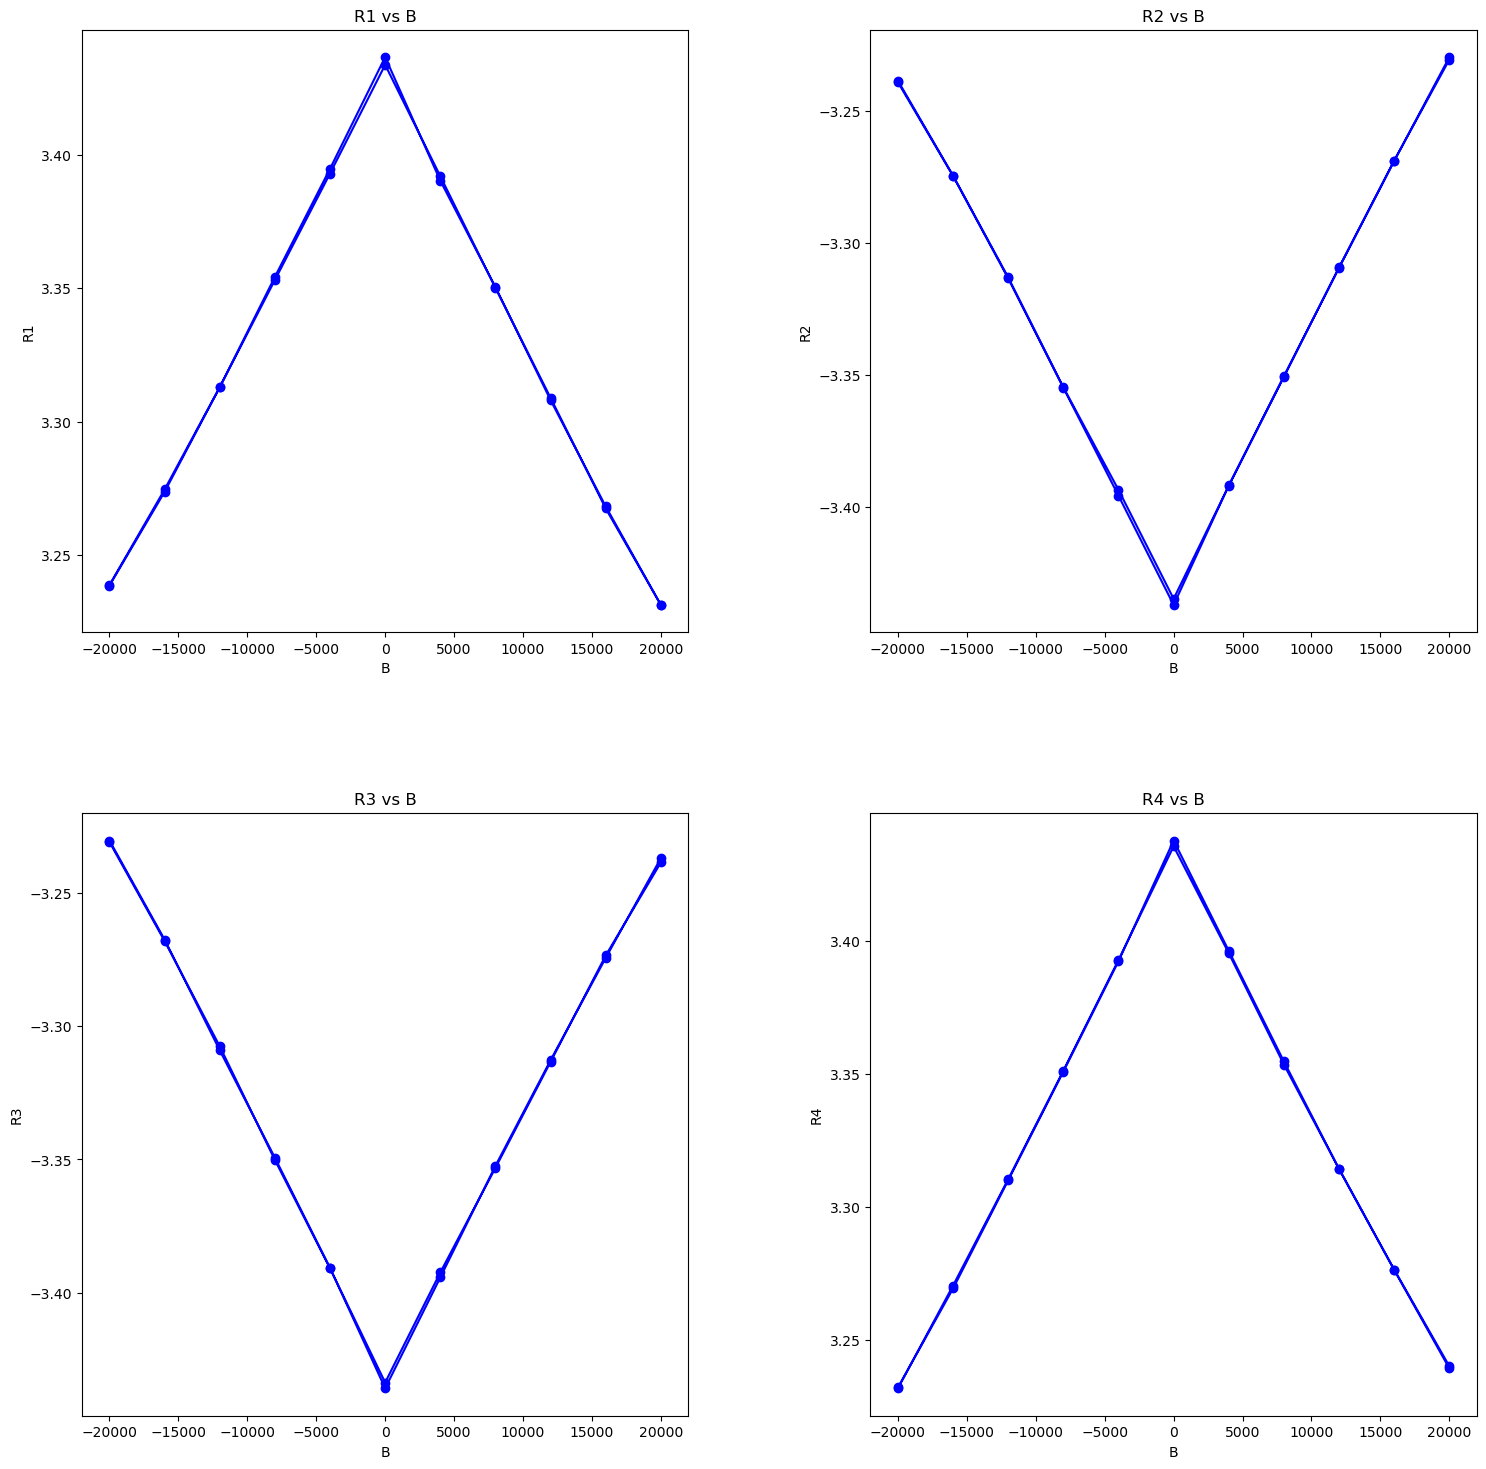

In [31]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [32]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

In [33]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

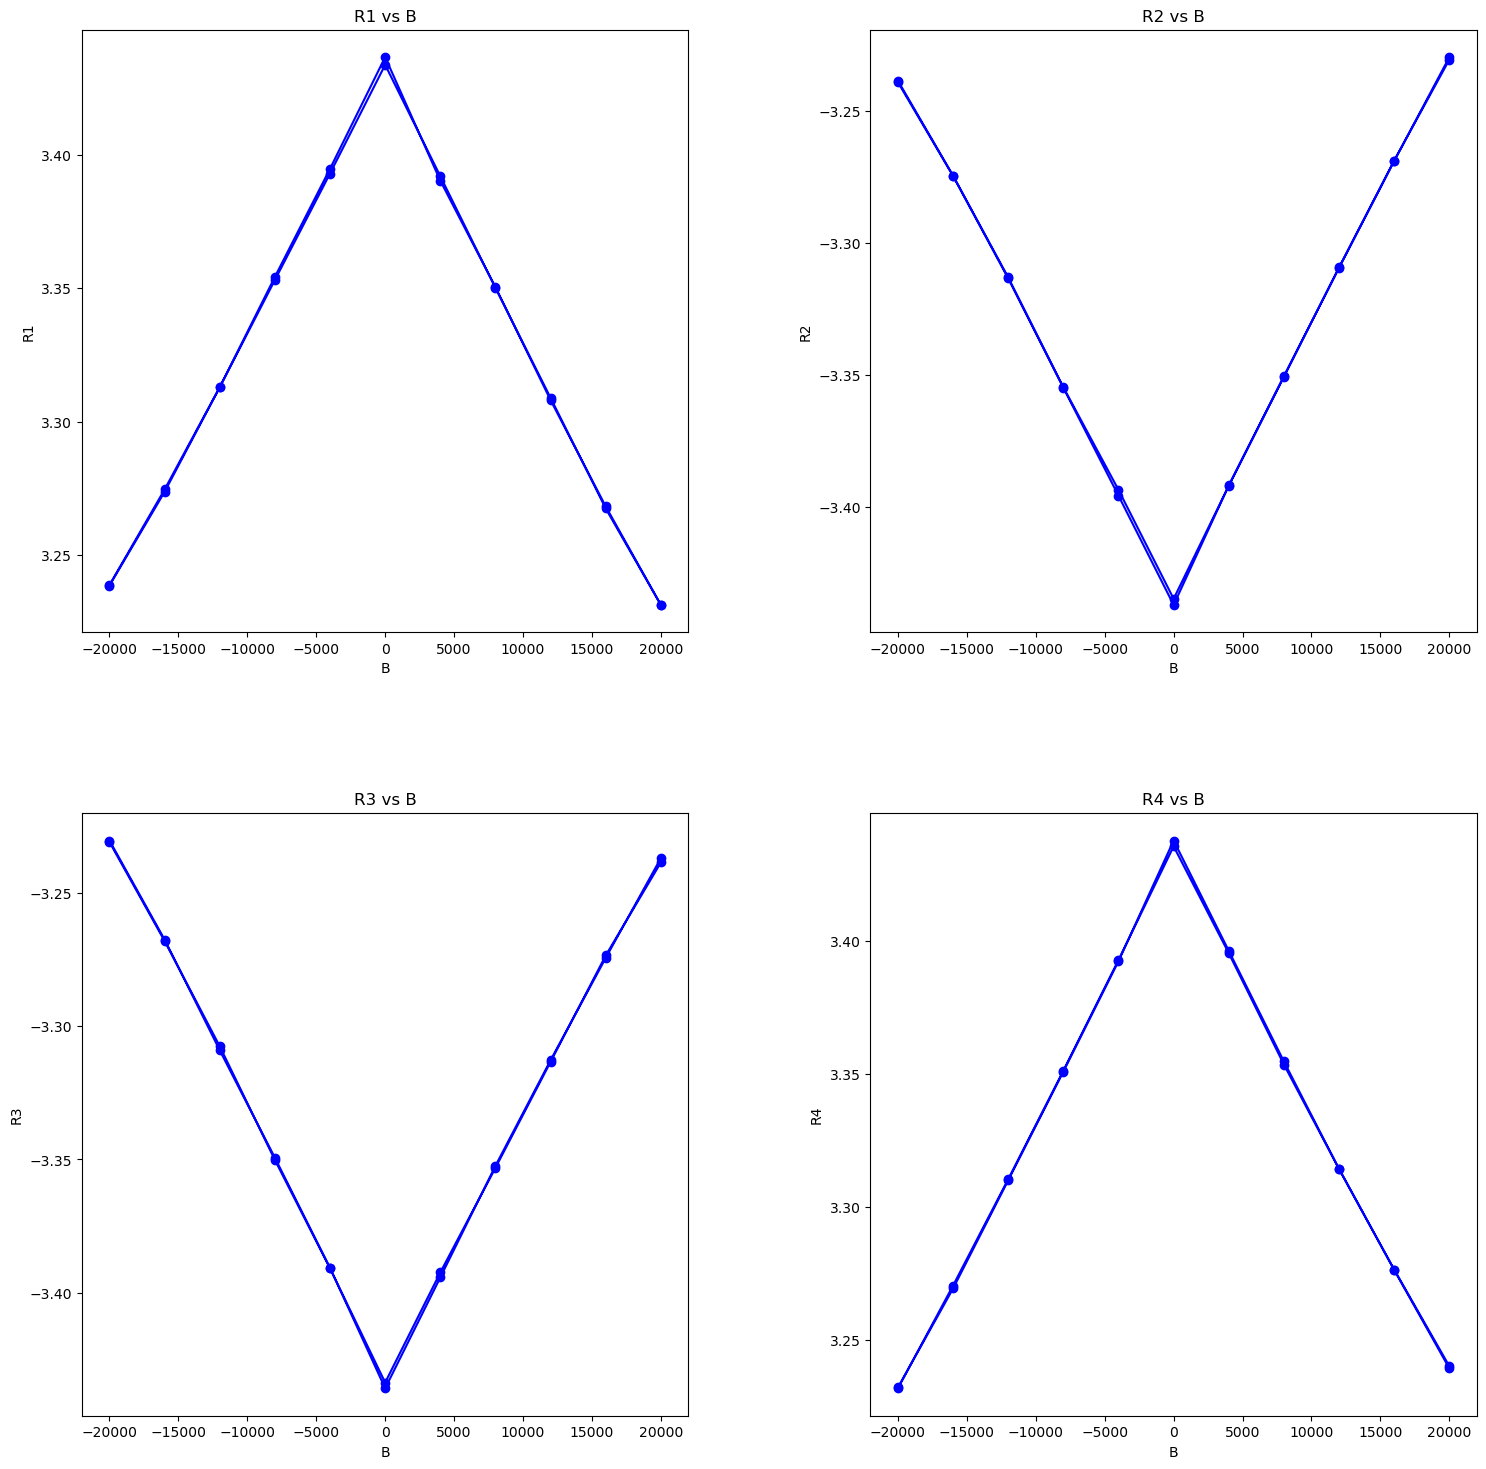

In [34]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [35]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

20000 -20000


In [36]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

10

In [37]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [38]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00002,20000.367969,20000,150.000390,64.628960,-64.614339,-64.738621,64.782828,5.997000e-07,1000000.0
1,0.00002,16000.351367,16000,150.000970,65.351178,-65.377976,-65.487642,65.523061,6.021000e-07,1000000.0
2,0.00002,12000.449512,12000,150.000721,66.178656,-66.187310,-66.255105,66.282116,5.996000e-07,1000000.0
3,0.00002,8000.392090,8000,150.000579,67.002173,-67.015794,-67.047608,67.090904,6.119000e-07,1000000.0
4,0.00002,4000.210376,4000,149.999976,67.837989,-67.840075,-67.885181,67.922732,5.965000e-07,1000000.0


In [39]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
11,0.00002,-20000.283496,-20000,150.000834,64.774241,-64.785510,-64.618002,64.633054,6.070000e-07,1000000.0
12,0.00002,-16000.290088,-16000,150.000665,65.475722,-65.495422,-65.361017,65.406236,6.118000e-07,1000000.0
13,0.00002,-12000.515137,-12000,150.000258,66.258378,-66.270661,-66.150606,66.205958,6.058000e-07,1000000.0
14,0.00002,-8000.466284,-8000,150.000320,67.084305,-67.098560,-67.003415,67.021797,6.101000e-07,1000000.0
15,0.00002,-4000.389954,-4000,150.000163,67.893961,-67.915713,-67.817088,67.854269,6.104000e-07,1000000.0


In [40]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [41]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00002,20000,150.000390,64.628960,-64.614339,-64.738621,64.782828,64.774241,-64.785510,-64.618002,64.633054,1000000.0
1,0.00002,16000,150.000970,65.351178,-65.377976,-65.487642,65.523061,65.475722,-65.495422,-65.361017,65.406236,1000000.0
2,0.00002,12000,150.000721,66.178656,-66.187310,-66.255105,66.282116,66.258378,-66.270661,-66.150606,66.205958,1000000.0
3,0.00002,8000,150.000579,67.002173,-67.015794,-67.047608,67.090904,67.084305,-67.098560,-67.003415,67.021797,1000000.0
4,0.00002,4000,149.999976,67.837989,-67.840075,-67.885181,67.922732,67.893961,-67.915713,-67.817088,67.854269,1000000.0


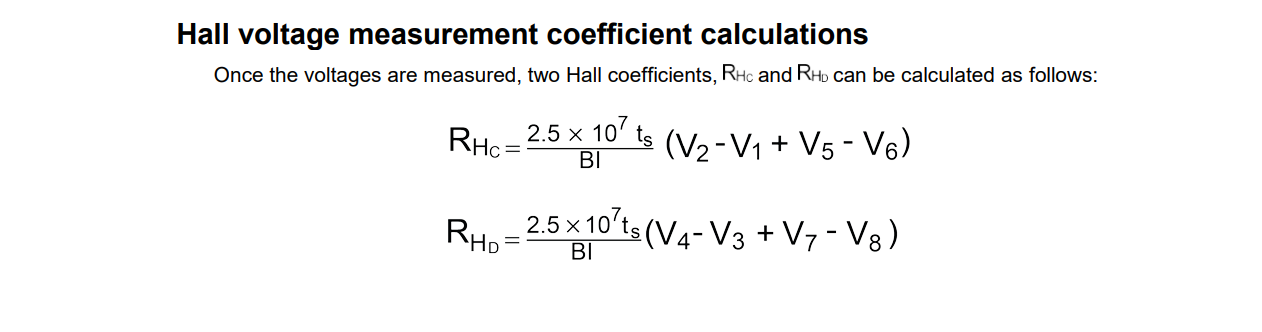
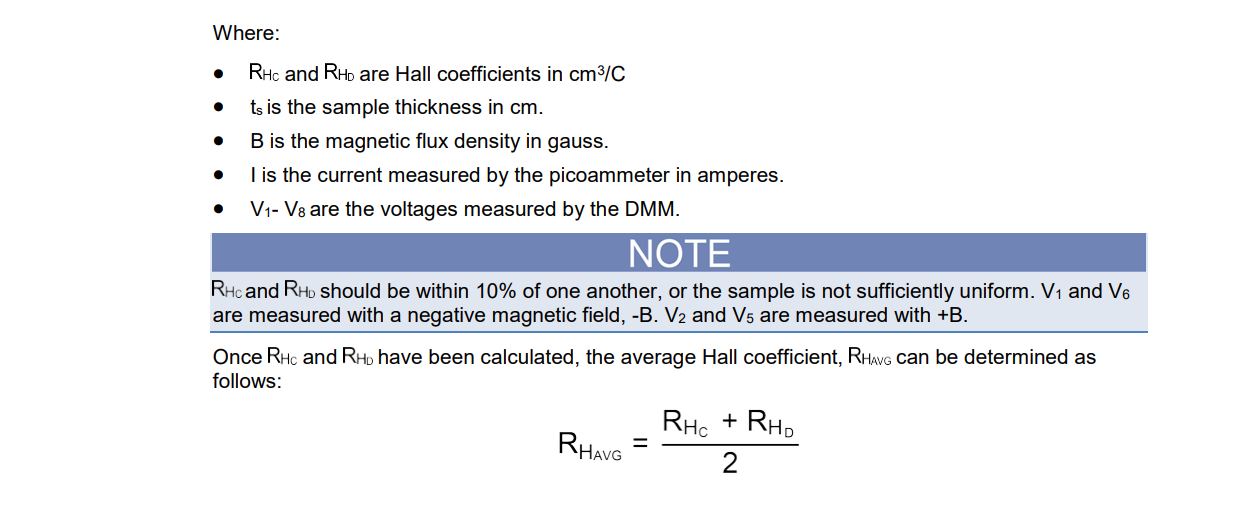

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [42]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

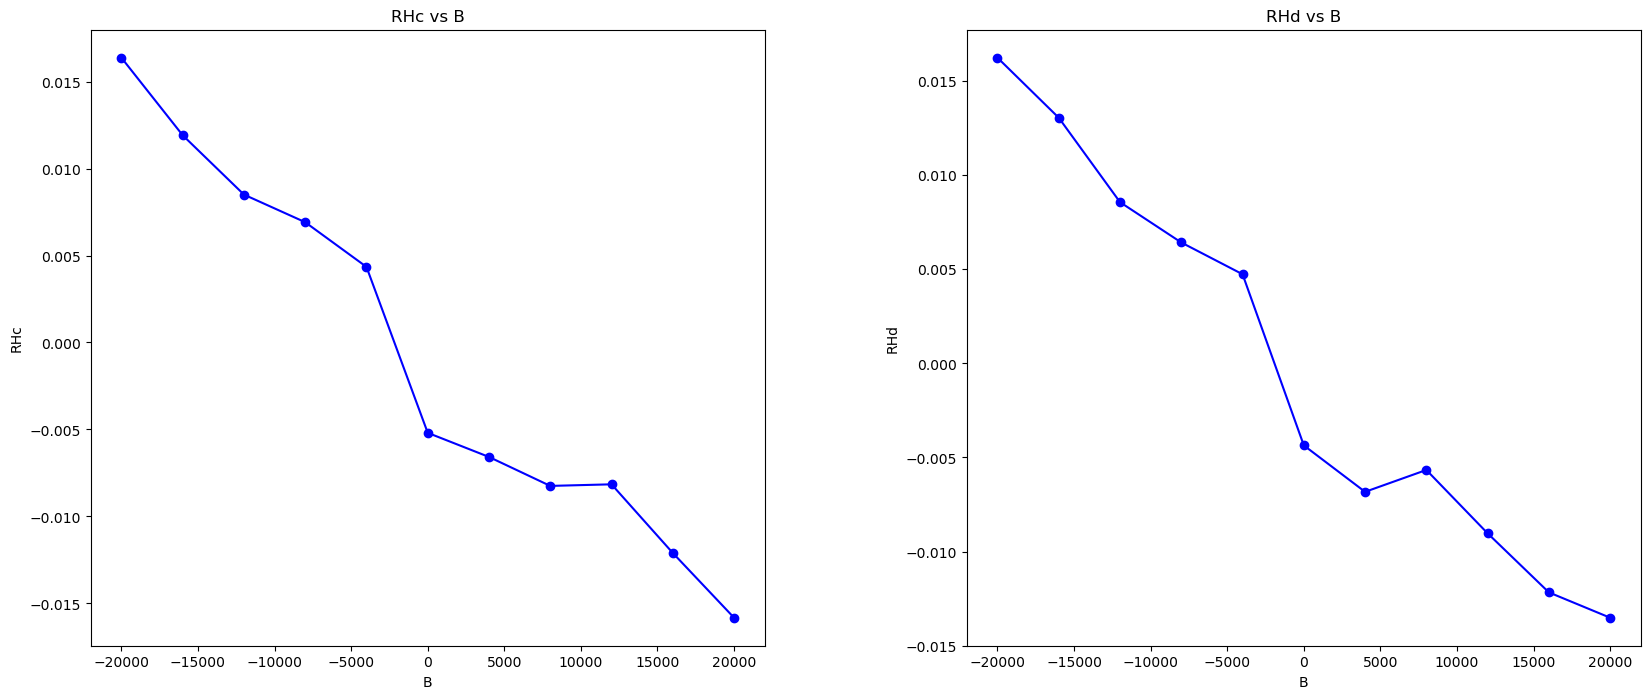

In [43]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

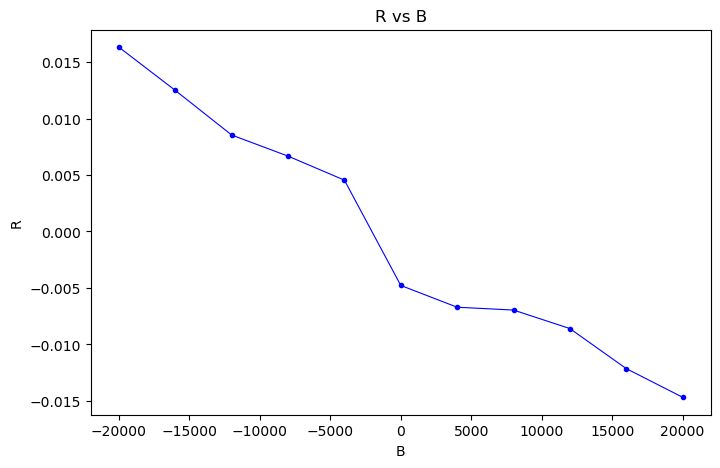

In [44]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [45]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00002,-20000,150.000834,64.774241,-64.785510,-64.618002,64.633054,64.628960,-64.614339,-64.738621,64.782828,1000000.0
1,0.00002,-16000,150.000665,65.475722,-65.495422,-65.361017,65.406236,65.351178,-65.377976,-65.487642,65.523061,1000000.0
2,0.00002,-12000,150.000258,66.258378,-66.270661,-66.150606,66.205958,66.178656,-66.187310,-66.255105,66.282116,1000000.0
3,0.00002,-8000,150.000320,67.084305,-67.098560,-67.003415,67.021797,67.002173,-67.015794,-67.047608,67.090904,1000000.0
4,0.00002,-4000,150.000163,67.893961,-67.915713,-67.817088,67.854269,67.837989,-67.840075,-67.885181,67.922732,1000000.0


### Hall resistance calculation

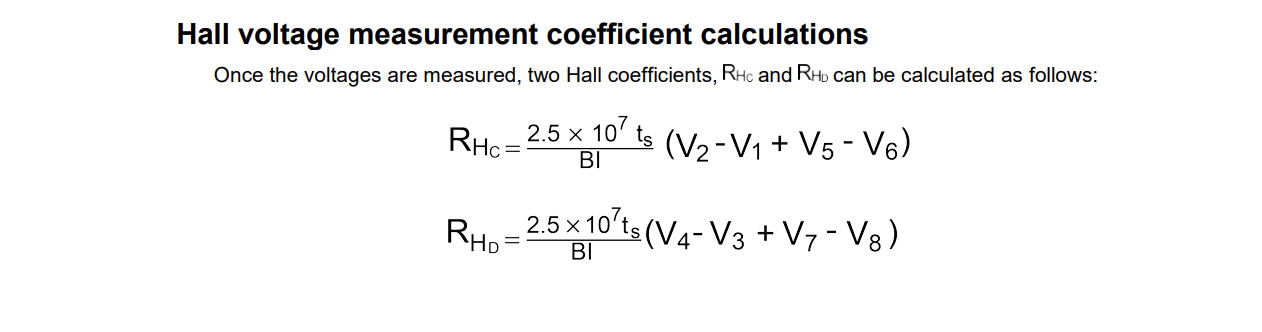

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [46]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

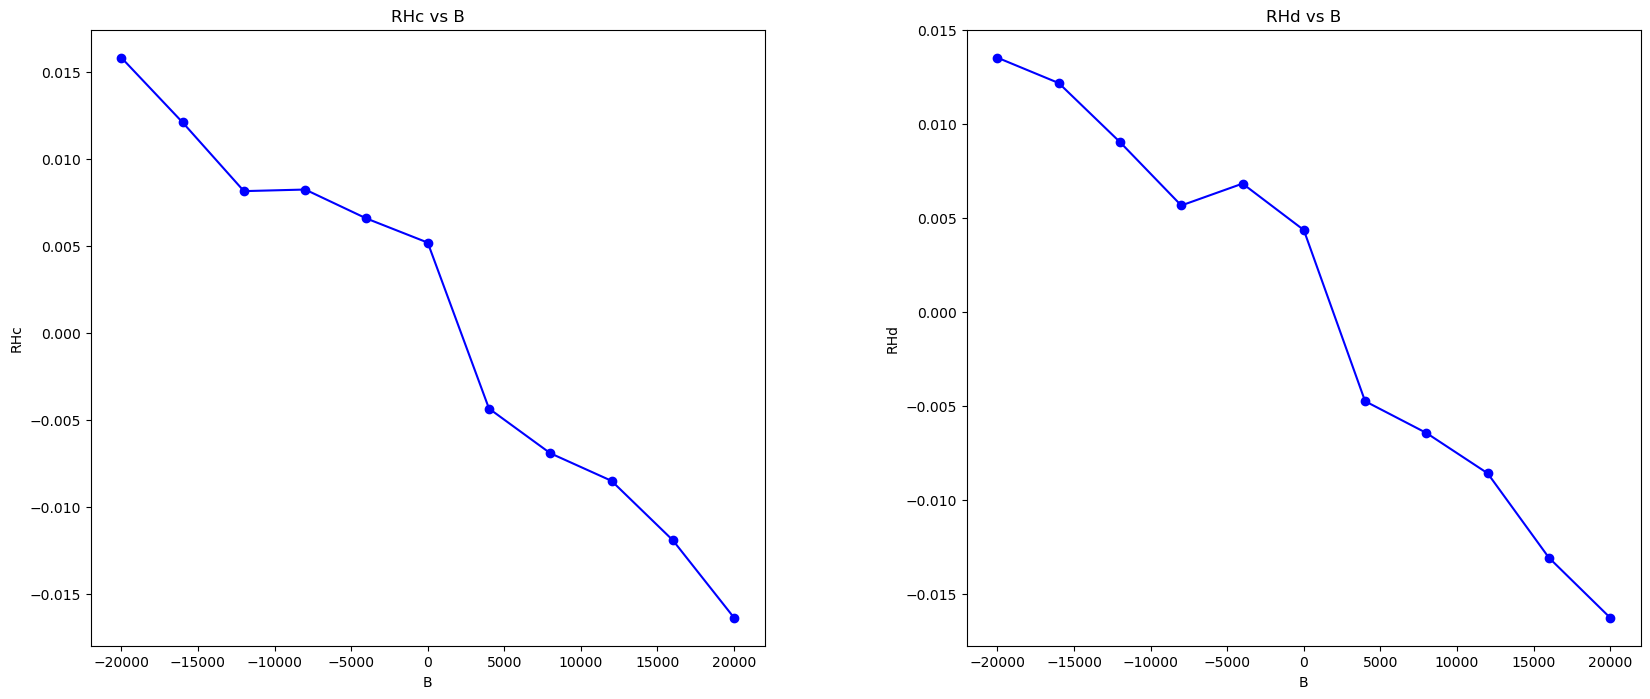

In [47]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

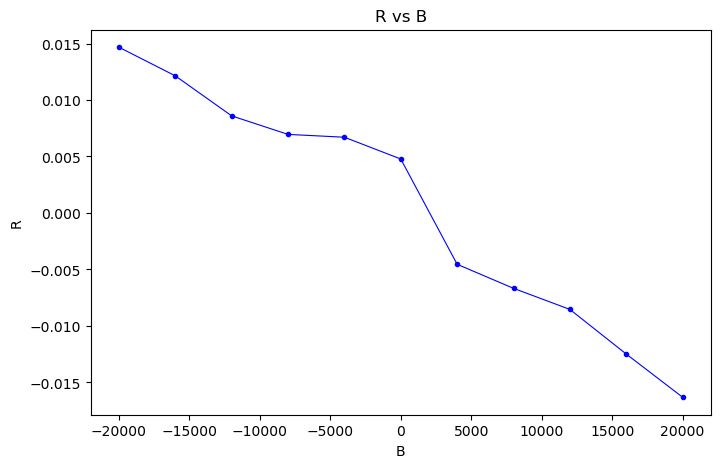

In [48]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

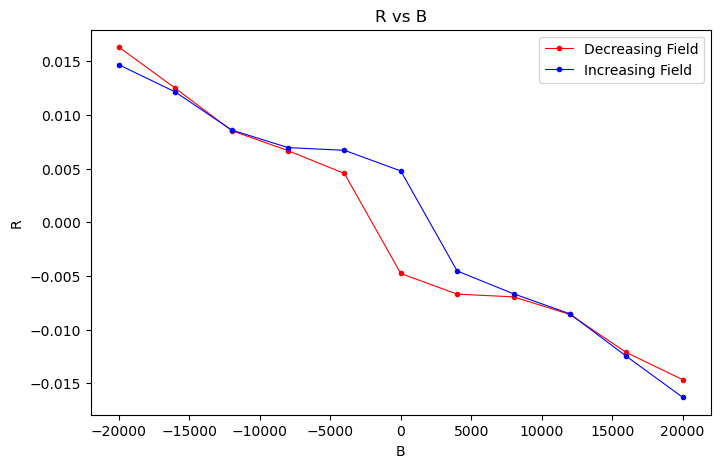

In [49]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [50]:
data = pd.concat([data_dec,data_inc])
data.reset_index(drop=True, inplace = True)
data.to_csv(f'{filename}')